# Workflow & Hyperparameter Optimization

In [129]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [4]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)

## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [32]:
stn_scaler= StandardScaler()
stn_scaler.fit(X_train)
X_train_scaled= stn_scaler.transform(X_train)
X_test_scaled= stn_scaler.transform(X_test)

## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [31]:
base_model= KNeighborsRegressor()
cv_res= cross_validate(base_model, X_train_scaled, y_train, cv=5)
cv_res['test_score'].mean()

0.7361762227737517

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model_GS= KNeighborsRegressor()

# Hyperparameter Grid
Grid= {'n_neighbors' : [1,5,10,20,50]}

# Instantiate Grid Search
search= GridSearchCV(model_GS, Grid, scoring='r2', cv=5, n_jobs=-1)

# Fit data to Grid Search
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [9]:
search.best_params_

{'n_neighbors': 10}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [10]:
search.best_score_

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [20]:
# Instantiate model
model_GS2= KNeighborsRegressor()

# Hyperparameter Grid
Grid2= {'n_neighbors' : [9,10,11,12,13,14,15,16,17,18,19,20]}

# Instantiate Grid Search
search2= GridSearchCV(model_GS2, Grid2, scoring='r2', cv=5, n_jobs=-1)


# Fit data to Grid Search
search2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                         19, 20]},
             scoring='r2')

In [24]:
k= search2.best_params_
best_k= k['n_neighbors']
best_k

16

In [25]:
best_score= search2.best_score_
best_score

0.7666311417513013

***🧪 Test your code***

In [26]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/05-Model-Tuning/data-workflow/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [37]:
scores=[]
for k in range(1,50):
    model= KNeighborsRegressor(n_neighbors=k)
    cv_res= cross_validate(model, X_train_scaled, y_train, cv=5)
    score= cv_res['test_score'].mean()
    scores.append(score)
# scores    

0.7666311417513013

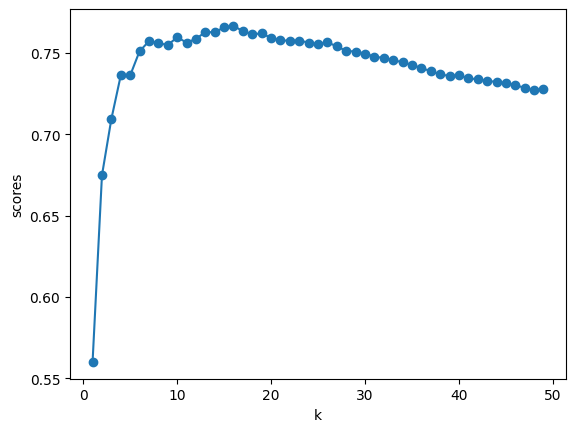

In [44]:
k= range(1,50)
plt.plot(k, scores, marker='o')
plt.xlabel('k')
plt.ylabel('scores')
max(scores)

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [45]:
# Instantiate model
model_mulp= KNeighborsRegressor()

# Hyperparameter Grid
Grid_mp= {'n_neighbors' : [1,5,10,20,50],
       'p':[1,2,3]}

# Instantiate Grid Search
search_mulp= GridSearchCV(model_mulp, Grid_mp, scoring='r2', cv=5, n_jobs=-1)


# Fit data to Grid Search
search_mulp.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [ ]:
# YOUR CODE HERE

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [46]:
search_mulp.best_params_

{'n_neighbors': 10, 'p': 1}

In [47]:
search_mulp.best_score_

0.7969255879201194

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [114]:
model_RS= KNeighborsRegressor()
grid= {'n_neighbors':stats.randint(1,50), 'p': [1,2,3]}
search_RS= RandomizedSearchCV(model_RS, grid, scoring='r2', n_iter=100, cv=10, n_jobs=-1)
search_RS.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff49170e230>,
                                        'p': [1, 2, 3]},
                   scoring='r2')

In [115]:
search_RS.best_params_

{'n_neighbors': 3, 'p': 1}

In [116]:
search_RS.best_score_

0.8060702764862852

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [121]:
model_RS= KNeighborsRegressor()
grid= {'n_neighbors': stats.randint(1,20), 'p': [1,2,3]}
search_RSm= RandomizedSearchCV(model_RS, grid, scoring='r2', n_iter=100, cv=10, n_jobs=-1)
search_RSm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4a009c1f0>,
                                        'p': [1, 2, 3]},
                   scoring='r2')

In [122]:
search_RSm.best_params_

{'n_neighbors': 3, 'p': 1}

In [123]:
search_RSm.best_score_

0.8060702764862852

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [125]:
pd.DataFrame(search_RSm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001028,0.000232,0.004434,0.000347,13,1,"{'n_neighbors': 13, 'p': 1}",0.846956,0.659584,0.834873,0.803195,0.770553,0.703561,0.841758,0.867610,0.869661,0.759974,0.795773,0.067754,17
1,0.001131,0.000193,0.046667,0.002704,19,3,"{'n_neighbors': 19, 'p': 3}",0.816115,0.625313,0.819622,0.767388,0.658168,0.709845,0.760246,0.824123,0.845431,0.639044,0.746530,0.078747,65
2,0.000920,0.000166,0.004581,0.000618,13,1,"{'n_neighbors': 13, 'p': 1}",0.846956,0.659584,0.834873,0.803195,0.770553,0.703561,0.841758,0.867610,0.869661,0.759974,0.795773,0.067754,17
3,0.000946,0.000101,0.001790,0.000158,10,2,"{'n_neighbors': 10, 'p': 2}",0.820163,0.611423,0.803045,0.787761,0.691905,0.732519,0.824910,0.862468,0.856404,0.656244,0.764684,0.082621,50
4,0.000901,0.000135,0.001689,0.000198,10,2,"{'n_neighbors': 10, 'p': 2}",0.820163,0.611423,0.803045,0.787761,0.691905,0.732519,0.824910,0.862468,0.856404,0.656244,0.764684,0.082621,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000918,0.000034,0.049609,0.002331,8,3,"{'n_neighbors': 8, 'p': 3}",0.823570,0.552254,0.785684,0.771439,0.573617,0.715008,0.823527,0.852511,0.843695,0.616379,0.735768,0.109136,80
96,0.000879,0.000086,0.046884,0.006286,7,3,"{'n_neighbors': 7, 'p': 3}",0.821779,0.525439,0.780975,0.771569,0.573548,0.725935,0.828871,0.854912,0.835789,0.615519,0.733433,0.113422,93
97,0.000843,0.000140,0.040837,0.007875,15,3,"{'n_neighbors': 15, 'p': 3}",0.822443,0.618978,0.805451,0.762548,0.654864,0.719190,0.771160,0.830391,0.840827,0.630848,0.745670,0.080509,70
98,0.001194,0.001156,0.004996,0.000771,12,1,"{'n_neighbors': 12, 'p': 1}",0.841075,0.666382,0.834239,0.804558,0.775024,0.696495,0.844749,0.865082,0.873880,0.758314,0.795980,0.067338,13


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [139]:
best_model= KNeighborsRegressor(n_neighbors=3, p=1)
best_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

In [140]:
y_pred= best_model.predict(X_test)

In [141]:
r2_test= r2_score(y_test, y_pred)
r2_test

0.6671859440136505

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [142]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/05-Model-Tuning/data-workflow/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 FAILED                                       [100%]

=================================== FAILURES ===================================
________________________________ TestR2.test_r2 ________________________________

self = <tests.test_r2.TestR2 testMethod=test_r2>

    def test_r2(self):
>       self.assertGreater(self.result.r2_test, 0.72)
E       AssertionError: 0.6671859440136505 not greater than 0.72

test_r2.py:6: AssertionError
=========================== short test summary info ============================
FAILED test_r2.py::TestR2::test_r2 

🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!